# Log-transformed data; with OHE and no scaling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000255F0514E48>]],
      dtype=object)

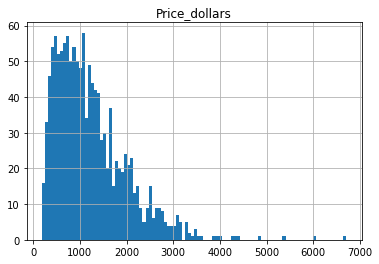

In [2]:
# Read

csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')

df.hist(column='Price_dollars', bins=100)

# #1 Linear Regression Model: 

In [3]:
df.head()
df2=df
df2

,Company,Memory_Structure_Categories,Gpu_Type,Gpu_Company,OpSys,Cpu_Company,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numeric,Price_dollars
0,Asus,Hybrid,GeForce GTX 1080,Nvidia,Windows 10,Intel,17.3,2.90,32,512,4.70,4279
1,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.70,32,512,4.60,3564
2,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.70,16,256,4.60,3025
3,Lenovo,Hybrid,GeForce GTX 1070,Nvidia,Windows 10,Intel,17.3,2.70,32,256,4.60,2929
4,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.60,16,128,4.60,2519
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Samsung,SSD,HD Graphics 620,Intel,Windows 10,Intel,13.3,2.50,8,256,0.81,1649
1298,Lenovo,Flash,HD Graphics 400,Intel,Windows 10,Intel,10.1,1.44,4,64,0.69,711
1299,Lenovo,Flash,HD Graphics 400,Intel,Android,Intel,10.1,1.44,4,64,0.69,604
1300,Lenovo,Flash,HD Graphics 400,Intel,Windows 10,Intel,10.1,1.44,4,64,0.69,527


In [4]:

df2['Log_Price_dollars'] = np.log(df2['Price_dollars'])

In [5]:
df2 = df2.drop(["Price_dollars", "Gpu_Type"], axis=1)
df2

,Company,Memory_Structure_Categories,Gpu_Company,OpSys,Cpu_Company,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numeric,Log_Price_dollars
0,Asus,Hybrid,Nvidia,Windows 10,Intel,17.3,2.90,32,512,4.70,8.361475
1,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.70,32,512,4.60,8.178639
2,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.70,16,256,4.60,8.014666
3,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.70,32,256,4.60,7.982416
4,Lenovo,Hybrid,Nvidia,Windows 10,Intel,17.3,2.60,16,128,4.60,7.831617
...,...,...,...,...,...,...,...,...,...,...,...
1297,Samsung,SSD,Intel,Windows 10,Intel,13.3,2.50,8,256,0.81,7.407924
1298,Lenovo,Flash,Intel,Windows 10,Intel,10.1,1.44,4,64,0.69,6.566672
1299,Lenovo,Flash,Intel,Android,Intel,10.1,1.44,4,64,0.69,6.403574
1300,Lenovo,Flash,Intel,Windows 10,Intel,10.1,1.44,4,64,0.69,6.267201


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000255F19B2EB8>]],
      dtype=object)

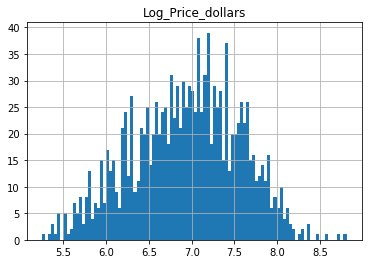

In [6]:
df2.hist(column='Log_Price_dollars', bins=100)

In [7]:
column_names_for_onehot = df2[["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"]].columns[0:]
column_names_for_onehot

Index(['Company', 'Cpu_Company', 'Memory_Structure_Categories', 'Gpu_Company',
       'OpSys'],
      dtype='object')

In [8]:
df2 = pd.get_dummies(df2, columns=column_names_for_onehot)
X = df2.drop(["Log_Price_dollars"], axis=1)
y = df2["Log_Price_dollars"]
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

(1302, 42) (1302,)


In [9]:
X

,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numeric,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,Gpu_Company_Nvidia,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,17.3,2.90,32,512,4.70,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,17.3,2.70,32,512,4.60,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,17.3,2.70,16,256,4.60,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,17.3,2.70,32,256,4.60,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,17.3,2.60,16,128,4.60,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,13.3,2.50,8,256,0.81,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1298,10.1,1.44,4,64,0.69,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1299,10.1,1.44,4,64,0.69,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1300,10.1,1.44,4,64,0.69,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
y = df2["Log_Price_dollars"]
y

0       8.361475
1       8.178639
2       8.014666
3       7.982416
4       7.831617
          ...   
1297    7.407924
1298    6.566672
1299    6.403574
1300    6.267201
1301    5.860786
Name: Log_Price_dollars, Length: 1302, dtype: float64

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.7609624880867477


In [12]:
y_pred = model.predict(X_test)

In [13]:
type(y_test)

pandas.core.series.Series

In [14]:
result_lr = pd.DataFrame({'Actual_LR': round(np.exp(y_test),0), 
                          'Predicted_LR': np.exp(y_pred).round(0), 
                          'pctDiff_LR': round(abs((np.exp(y_pred)-np.exp(y_test))*100/np.exp(y_test)),0),
                          'Diff_LR': round((np.exp(y_pred)-np.exp(y_test)),0)})
result_lr

,Actual_LR,Predicted_LR,pctDiff_LR,Diff_LR
1232,317.0,413.0,30.0,96.0
1030,2452.0,1336.0,45.0,-1116.0
163,1099.0,1085.0,1.0,-14.0
1012,1216.0,1055.0,13.0,-161.0
711,384.0,344.0,10.0,-40.0
...,...,...,...,...
34,1098.0,909.0,17.0,-189.0
85,886.0,608.0,31.0,-278.0
978,703.0,882.0,25.0,179.0
156,2299.0,1442.0,37.0,-857.0


In [15]:
result_lr[result_lr < 0].count()

Actual_LR         0
Predicted_LR      0
pctDiff_LR        0
Diff_LR         154
dtype: int64

In [16]:
result_lr.pctDiff_LR.mean()

25.162576687116566

In [17]:
np.exp(y_test).max()

6048.999999999995

In [18]:
np.exp(y_pred).max()

5076.0465551033

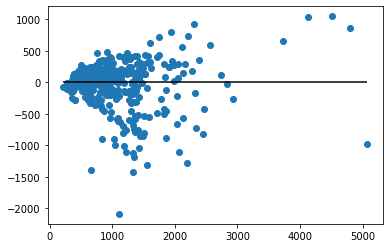

In [19]:
# Plot Residuals
plt.scatter(np.exp(y_pred), np.exp(y_pred) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred).min(), xmax=np.exp(y_pred).max())
plt.show()

# The lienar model is usually underestimating how much something costs

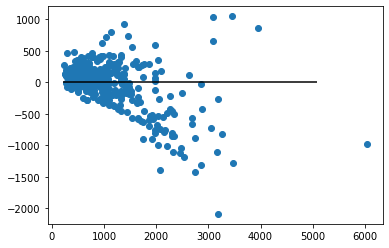

In [20]:
# Plot Residuals-like plot
plt.scatter(np.exp(y_test), np.exp(y_pred) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred).min(), xmax=np.exp(y_pred).max())
plt.show()

In [21]:
result_lr_2 = pd.DataFrame(list(zip(model.coef_, X)))
result_lr_2 = result_lr_2.sort_values(0)
result_lr_2.columns = ['Weights','Coefficient']
result_lr_2

,Weights,Coefficient
22,-0.636398,Company_Vero
17,-0.535152,Company_Mediacom
8,-0.400609,Company_Chuwi
26,-0.365497,Memory_Structure_Categories_Flash
39,-0.333407,OpSys_Windows 10 S
10,-0.299504,Company_Fujitsu
5,-0.296882,Company_Acer
33,-0.283857,OpSys_Android
37,-0.240810,OpSys_No OS
24,-0.186305,Cpu_Company_AMD


In [22]:
print(model.intercept_)

6.538329085445577


# #2 RF regressor model

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

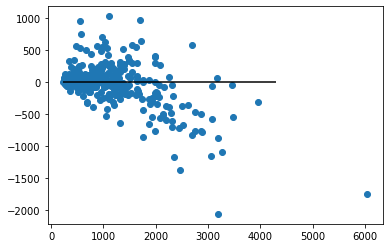

In [24]:
plt.scatter(np.exp(y_test), np.exp(y_pred) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred).min(), xmax=np.exp(y_pred).max())
plt.show()

In [25]:
result_rf = pd.DataFrame({'Actual_RF': round(np.exp(y_test),0), 
                          'Predicted_RF': np.exp(y_pred).round(0), 
                          'pctDiff_RF': round(abs((np.exp(y_pred)-np.exp(y_test))*100/np.exp(y_test)),0),
                          'Diff_RF': round((np.exp(y_pred)-np.exp(y_test)),0)})
result_rf

,Actual_RF,Predicted_RF,pctDiff_RF,Diff_RF
1232,317.0,364.0,15.0,47.0
1030,2452.0,1742.0,29.0,-710.0
163,1099.0,916.0,17.0,-183.0
1012,1216.0,1095.0,10.0,-121.0
711,384.0,351.0,9.0,-33.0
...,...,...,...,...
34,1098.0,2130.0,94.0,1032.0
85,886.0,682.0,23.0,-204.0
978,703.0,810.0,15.0,107.0
156,2299.0,1811.0,21.0,-488.0


In [26]:
result_rf.pctDiff_RF.mean()

18.680981595092025

# #3. Neural Network

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
NN_model = Sequential()
# The Input Layer :
NN_model.add(Dense(84, kernel_initializer='normal',input_dim = 42, activation='relu'))
# The Hidden Layers :
NN_model.add(Dense(42, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(42, kernel_initializer='normal',activation='sigmoid'))
NN_model.add(Dense(42, kernel_initializer='normal',activation='tanh'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
# Compile the network :
import keras.backend as K
NN_model.compile(optimizer='adam', loss='mean_absolute_error', metrics= ['binary_accuracy'])
NN_model.summary()
NN_model.fit(
    X_train,
    y_train,
    epochs=500,
    shuffle=True,
    verbose=2
)
NN_predictions0 = NN_model.predict(X_test)
NN_predictions1 = []
for NN in NN_predictions0:
    NN_predictions1.append(NN[0])

Using TensorFlow backend.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 84)                3612      
_________________________________________________________________
dense_2 (Dense)              (None, 42)                3570      
_________________________________________________________________
dense_3 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_4 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 43        
Total params: 10,837
Trainable params: 10,837
Non-trainable params: 0
_________________________________________________________________



Epoch 1/500





 - 2s - loss: 6.1589 - binary_accuracy: 0.0000e+00
Epoch 2/500
 - 0s - loss: 3.7249 - binary_accuracy: 0.0000e+00
Epo

In [28]:
result_nn = pd.DataFrame({'Actual_NN': round(np.exp(y_test),0), 
                          'Predicted_NN': np.exp(NN_predictions1).round(0), 
                          'pctDiff_NN': round(abs((np.exp(NN_predictions1)-np.exp(y_test))*100/np.exp(y_test)),0),
                          'Diff_NN': round((np.exp(NN_predictions1)-np.exp(y_test)),0)})
result_nn

,Actual_NN,Predicted_NN,pctDiff_NN,Diff_NN
1232,317.0,637.0,101.0,320.0
1030,2452.0,1291.0,47.0,-1161.0
163,1099.0,939.0,15.0,-160.0
1012,1216.0,1062.0,13.0,-154.0
711,384.0,329.0,14.0,-55.0
...,...,...,...,...
34,1098.0,933.0,15.0,-165.0
85,886.0,574.0,35.0,-312.0
978,703.0,685.0,3.0,-18.0
156,2299.0,1074.0,53.0,-1225.0


In [29]:
result_nn.pctDiff_NN.mean()

20.00920245398773

In [30]:
result_nn

,Actual_NN,Predicted_NN,pctDiff_NN,Diff_NN
1232,317.0,637.0,101.0,320.0
1030,2452.0,1291.0,47.0,-1161.0
163,1099.0,939.0,15.0,-160.0
1012,1216.0,1062.0,13.0,-154.0
711,384.0,329.0,14.0,-55.0
...,...,...,...,...
34,1098.0,933.0,15.0,-165.0
85,886.0,574.0,35.0,-312.0
978,703.0,685.0,3.0,-18.0
156,2299.0,1074.0,53.0,-1225.0


# Combine predicted values by different ML algorithms

In [33]:
df_full = df2.join([result_lr,result_rf,result_nn], how="inner")
df_full

,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numeric,Log_Price_dollars,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,pctDiff_LR,Diff_LR,Actual_RF,Predicted_RF,pctDiff_RF,Diff_RF,Actual_NN,Predicted_NN,pctDiff_NN,Diff_NN
6,17.3,2.80,32,1000,4.42,8.280964,0,0,0,0,...,22.0,857.0,3948.0,3636.0,8.0,-312.0,3948.0,3747.0,5.0,-201.0
8,17.3,2.80,32,512,4.42,8.149602,0,0,0,0,...,30.0,1047.0,3462.0,3414.0,1.0,-48.0,3462.0,3498.0,1.0,36.0
12,17.3,2.60,32,256,4.42,8.032685,0,0,0,0,...,34.0,1043.0,3080.0,3016.0,2.0,-64.0,3080.0,2775.0,10.0,-305.0
19,17.3,2.80,16,512,4.36,8.151622,0,0,0,0,...,37.0,-1278.0,3469.0,2930.0,16.0,-539.0,3469.0,2005.0,42.0,-1464.0
27,17.3,2.80,16,256,4.20,7.958227,1,0,0,0,...,46.0,-1307.0,2859.0,2366.0,17.0,-493.0,2859.0,1900.0,34.0,-959.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,15.6,1.80,8,512,1.09,7.835579,0,0,0,0,...,47.0,-1181.0,2529.0,1857.0,27.0,-672.0,2529.0,1608.0,36.0,-921.0
1276,11.6,1.60,4,256,1.08,6.961296,0,1,0,0,...,23.0,244.0,1055.0,524.0,50.0,-531.0,1055.0,1006.0,5.0,-49.0
1284,12.5,1.20,8,512,0.99,7.338888,0,0,0,0,...,37.0,-574.0,1539.0,1844.0,20.0,305.0,1539.0,1525.0,1.0,-14.0
1292,12.0,1.20,8,256,0.92,7.236339,0,1,0,0,...,10.0,132.0,1389.0,1592.0,15.0,203.0,1389.0,1533.0,10.0,144.0


In [34]:
df_full.to_csv("combined_results.csv", encoding="utf-8", index=False)